In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from scipy.cluster.hierarchy import fcluster
import process_data

In [2]:
data=process_data.process('all_data.csv')
X,y=process_data.split_x_y(data)

In [3]:
CorrPatients=np.corrcoef(X)

In [34]:
CorrGenes=np.corrcoef(X.T)

/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

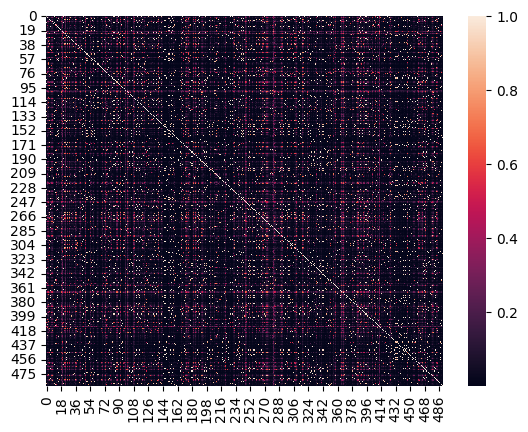

In [35]:
sns.heatmap(CorrPatients)

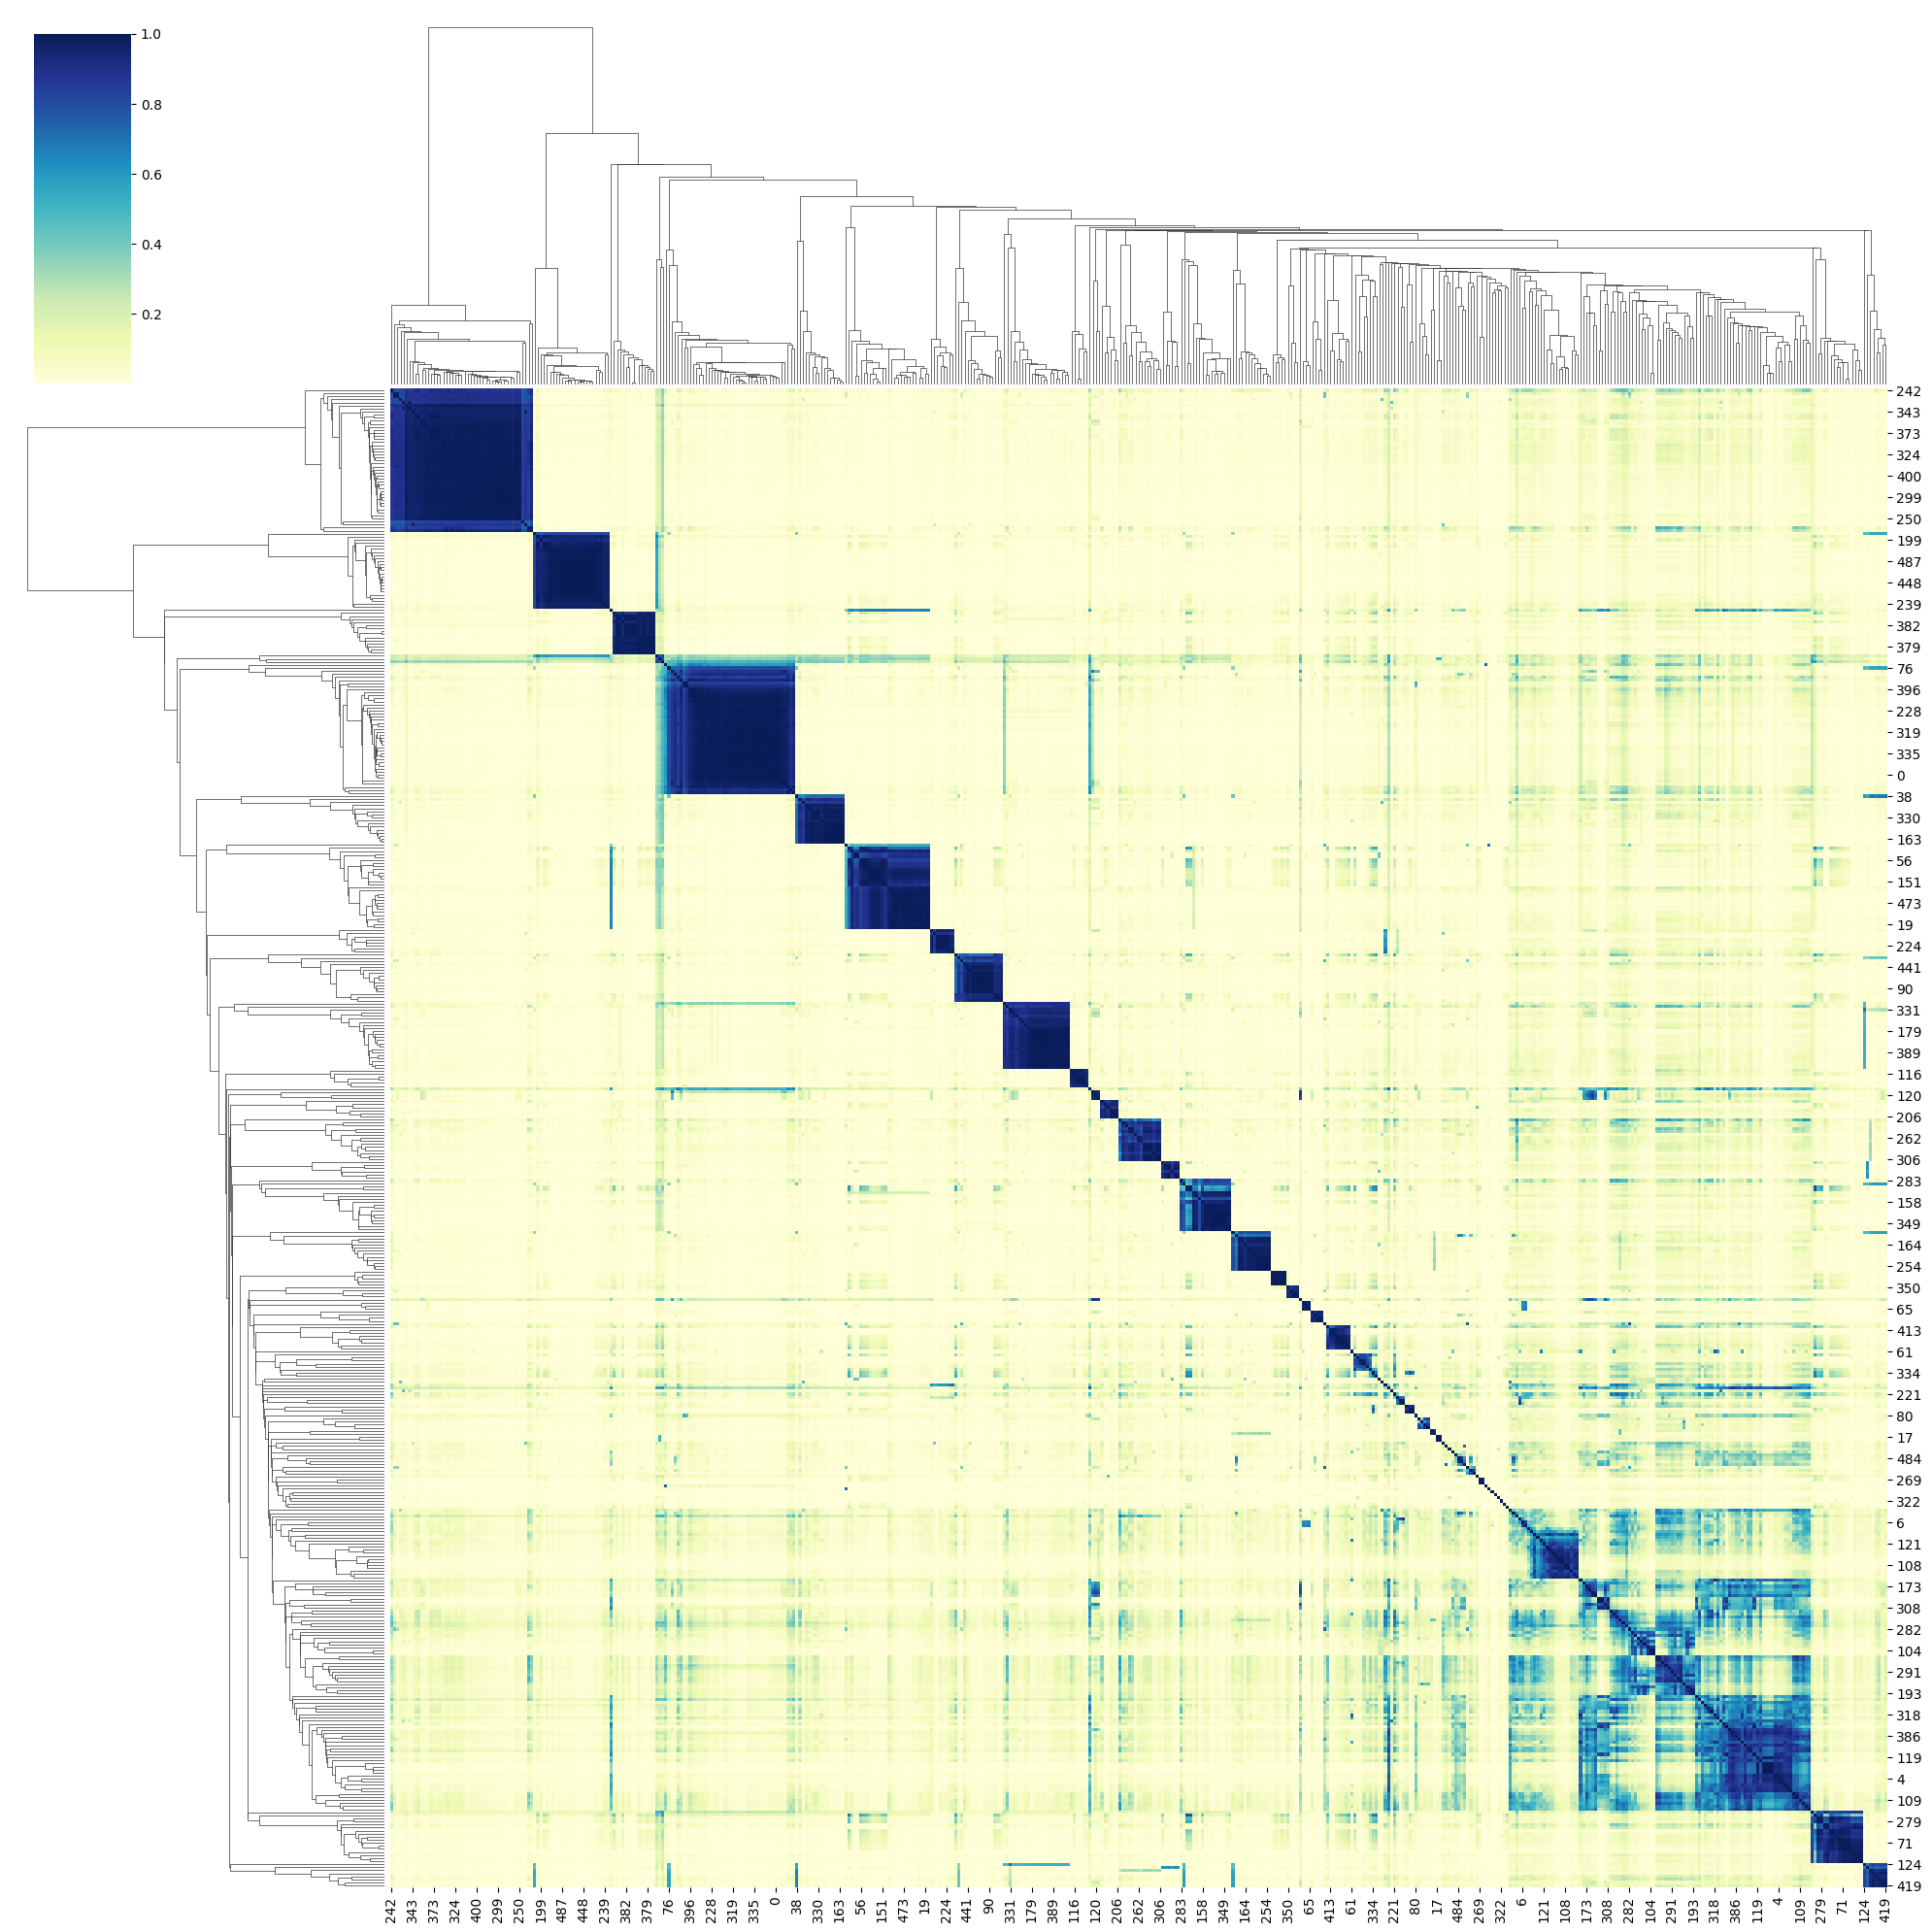

In [4]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients.T), method='single')
    
cl=sns.clustermap(CorrPatients, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringEuclidean.pdf') 

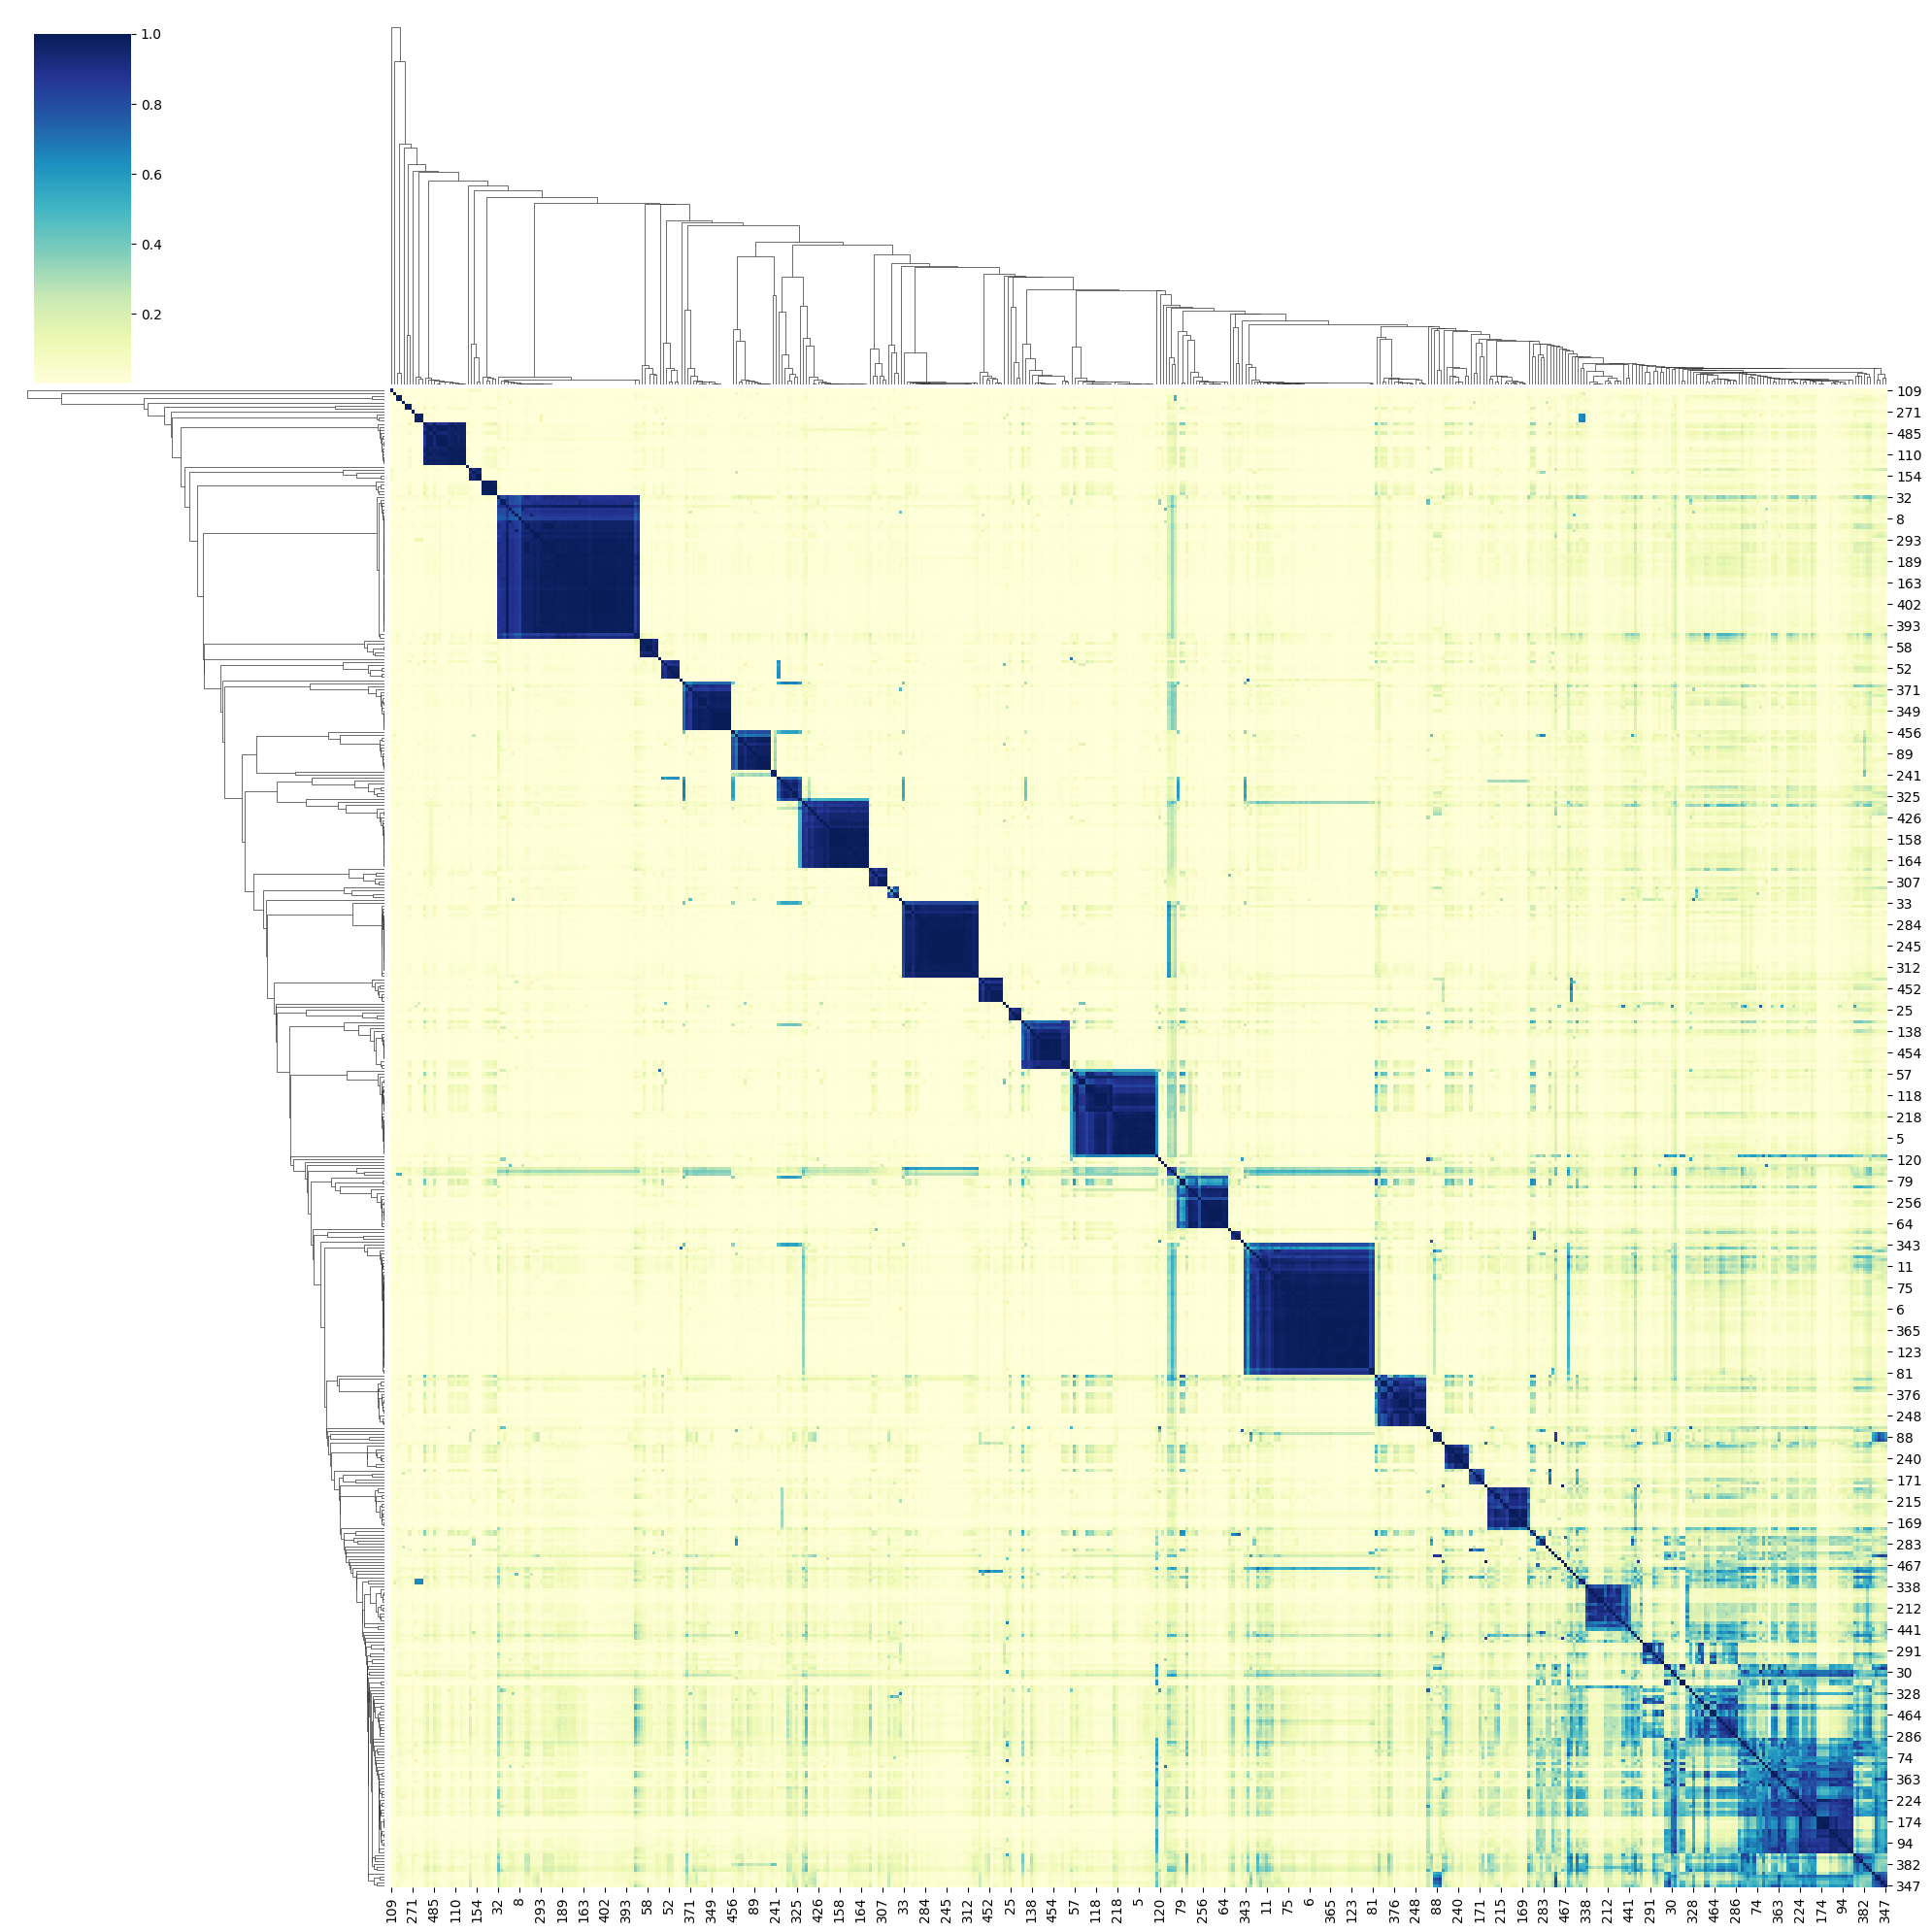

In [12]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients,metric='cosine'), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients.T,metric='cosine'), method='single')
    
cl=sns.clustermap(CorrPatients, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringCosine.pdf') 

In [5]:
def get_clusters(X,linkage,nb_clusters):
    fl = fcluster(linkage,nb_clusters,criterion='maxclust')
    clusters=[]
    for i in range(nb_clusters):
        df=X.iloc[np.where(fl==i+1)]
        clusters.append(df)
    return clusters

In [6]:
def get_stats(cluster):
    gene_expressions=pd.DataFrame(columns=['min','max','moyenne','écart_type'],index=cluster.columns)
    gene_expressions['min']=cluster[cluster.columns].min()
    gene_expressions['max']=cluster[cluster.columns].max()
    gene_expressions['moyenne']=cluster[cluster.columns].mean()
    gene_expressions['écart_type']=cluster[cluster.columns].std()
    return gene_expressions

In [7]:
cluster_1=get_clusters(X,row_linkage,3)[0]
cluster_2=get_clusters(X,row_linkage,3)[1]
cluster_3=get_clusters(X,row_linkage,3)[2]

In [8]:
get_stats(cluster_1).head(100)

,min,max,moyenne,écart_type
ENSG00000223972,0.000000,0.205515,0.030726,0.047995
ENSG00000227232,2.866048,37.225123,11.696455,6.456270
ENSG00000243485,0.000000,0.038289,0.002369,0.009176
ENSG00000268020,0.000000,0.040905,0.000870,0.005967
ENSG00000240361,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
ENSG00000175756,55.113432,274.880802,128.554633,42.054524
ENSG00000223663,0.000000,0.537421,0.066593,0.109855
ENSG00000221978,9.779051,101.770646,36.874256,21.623691
ENSG00000224870,3.193353,42.983269,14.893388,7.464631


In [17]:
sns.violinplot(cluster_1)

KeyboardInterrupt: 

### Gene clustering

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [125.0, 125.0, 151.25, 151.25],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [195.0, 195.0, 221.25, 221.25],
  [185.0, 185.0, 208.125, 208.125],
  [138.125, 138.125, 196.5625, 196.5625],
  [110.0, 110.0, 167.34375, 167.34375],
  [95.0, 95.0, 138.671875, 138.671875],
  [85.0, 85.0, 116.8359375, 116.8359375],
  [75.0, 75.0, 100.91796875, 100.91796875],
  [46.25, 46.25, 87.958984375, 87.958984375],
  [15.0, 15.0, 67.1044921875, 67.1044921875],
  [5.0, 5.0, 41.05224609375, 41.05224609375],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [23.0261

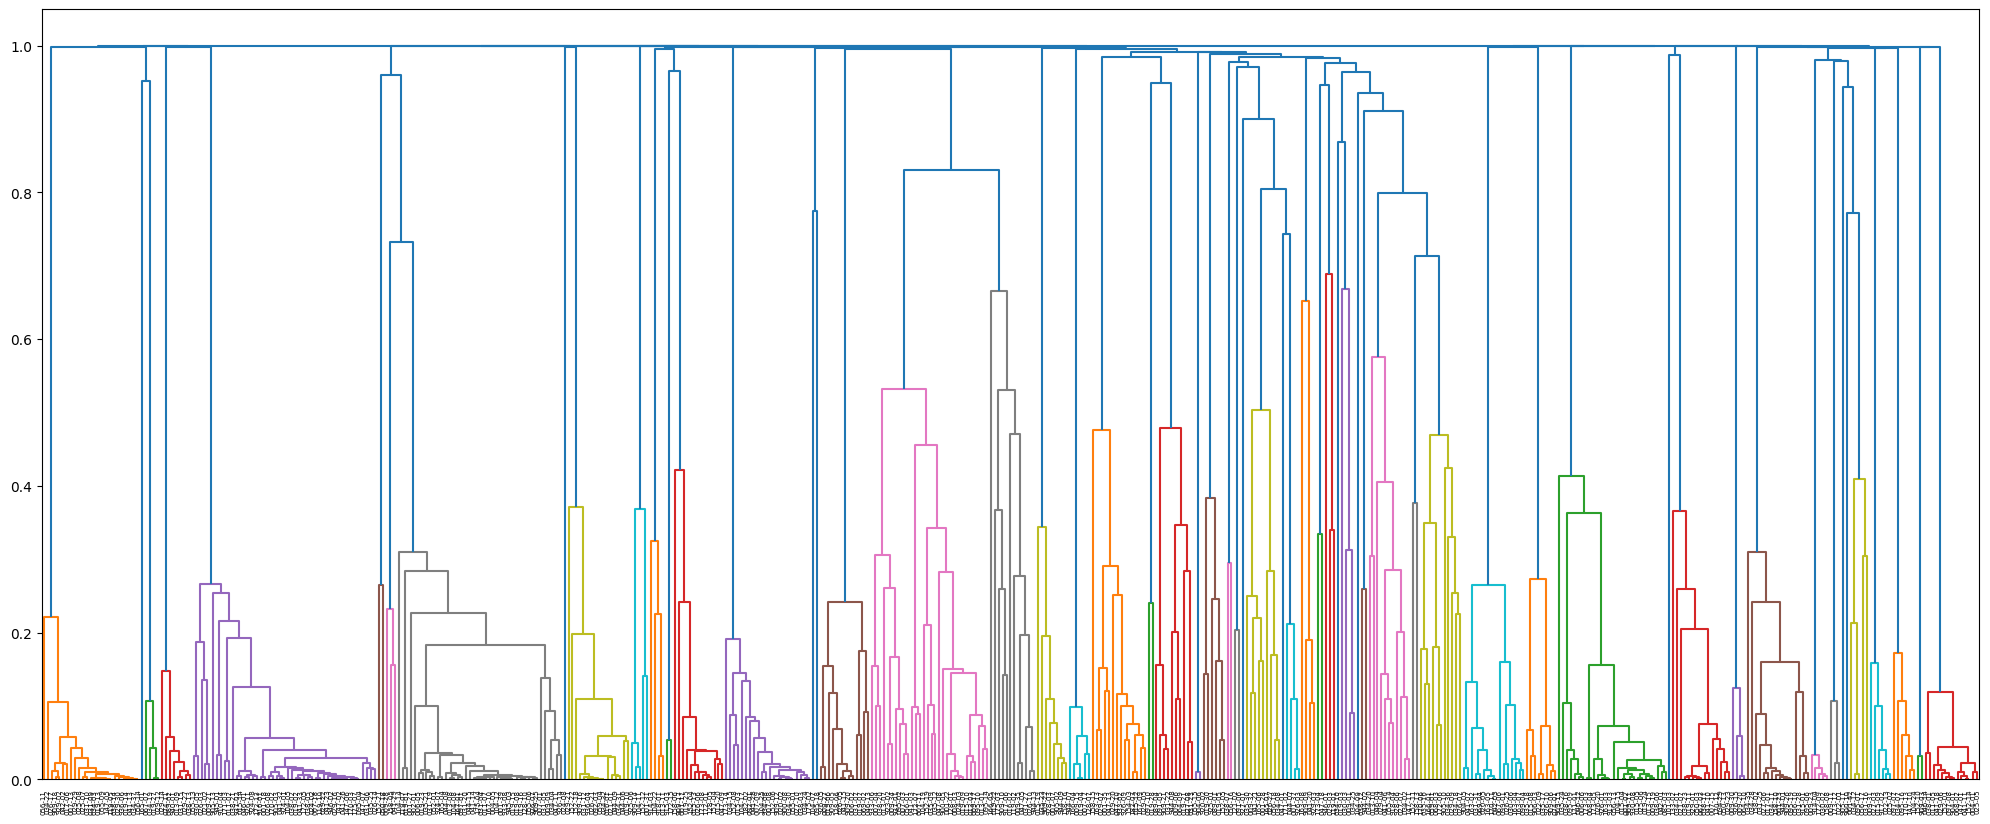

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,distance
from scipy.spatial.distance import squareform

plt.figure(figsize=(25,10))
distance=distance.pdist(X,metric='cosine')
Z = linkage(distance, 'complete')

dendrogram(Z, labels=X.index, orientation='top', 
           leaf_rotation=90)

### Impact of scaling

In [5]:
from sklearn.preprocessing import normalize

In [6]:
X_s=normalize(X,norm='l1')

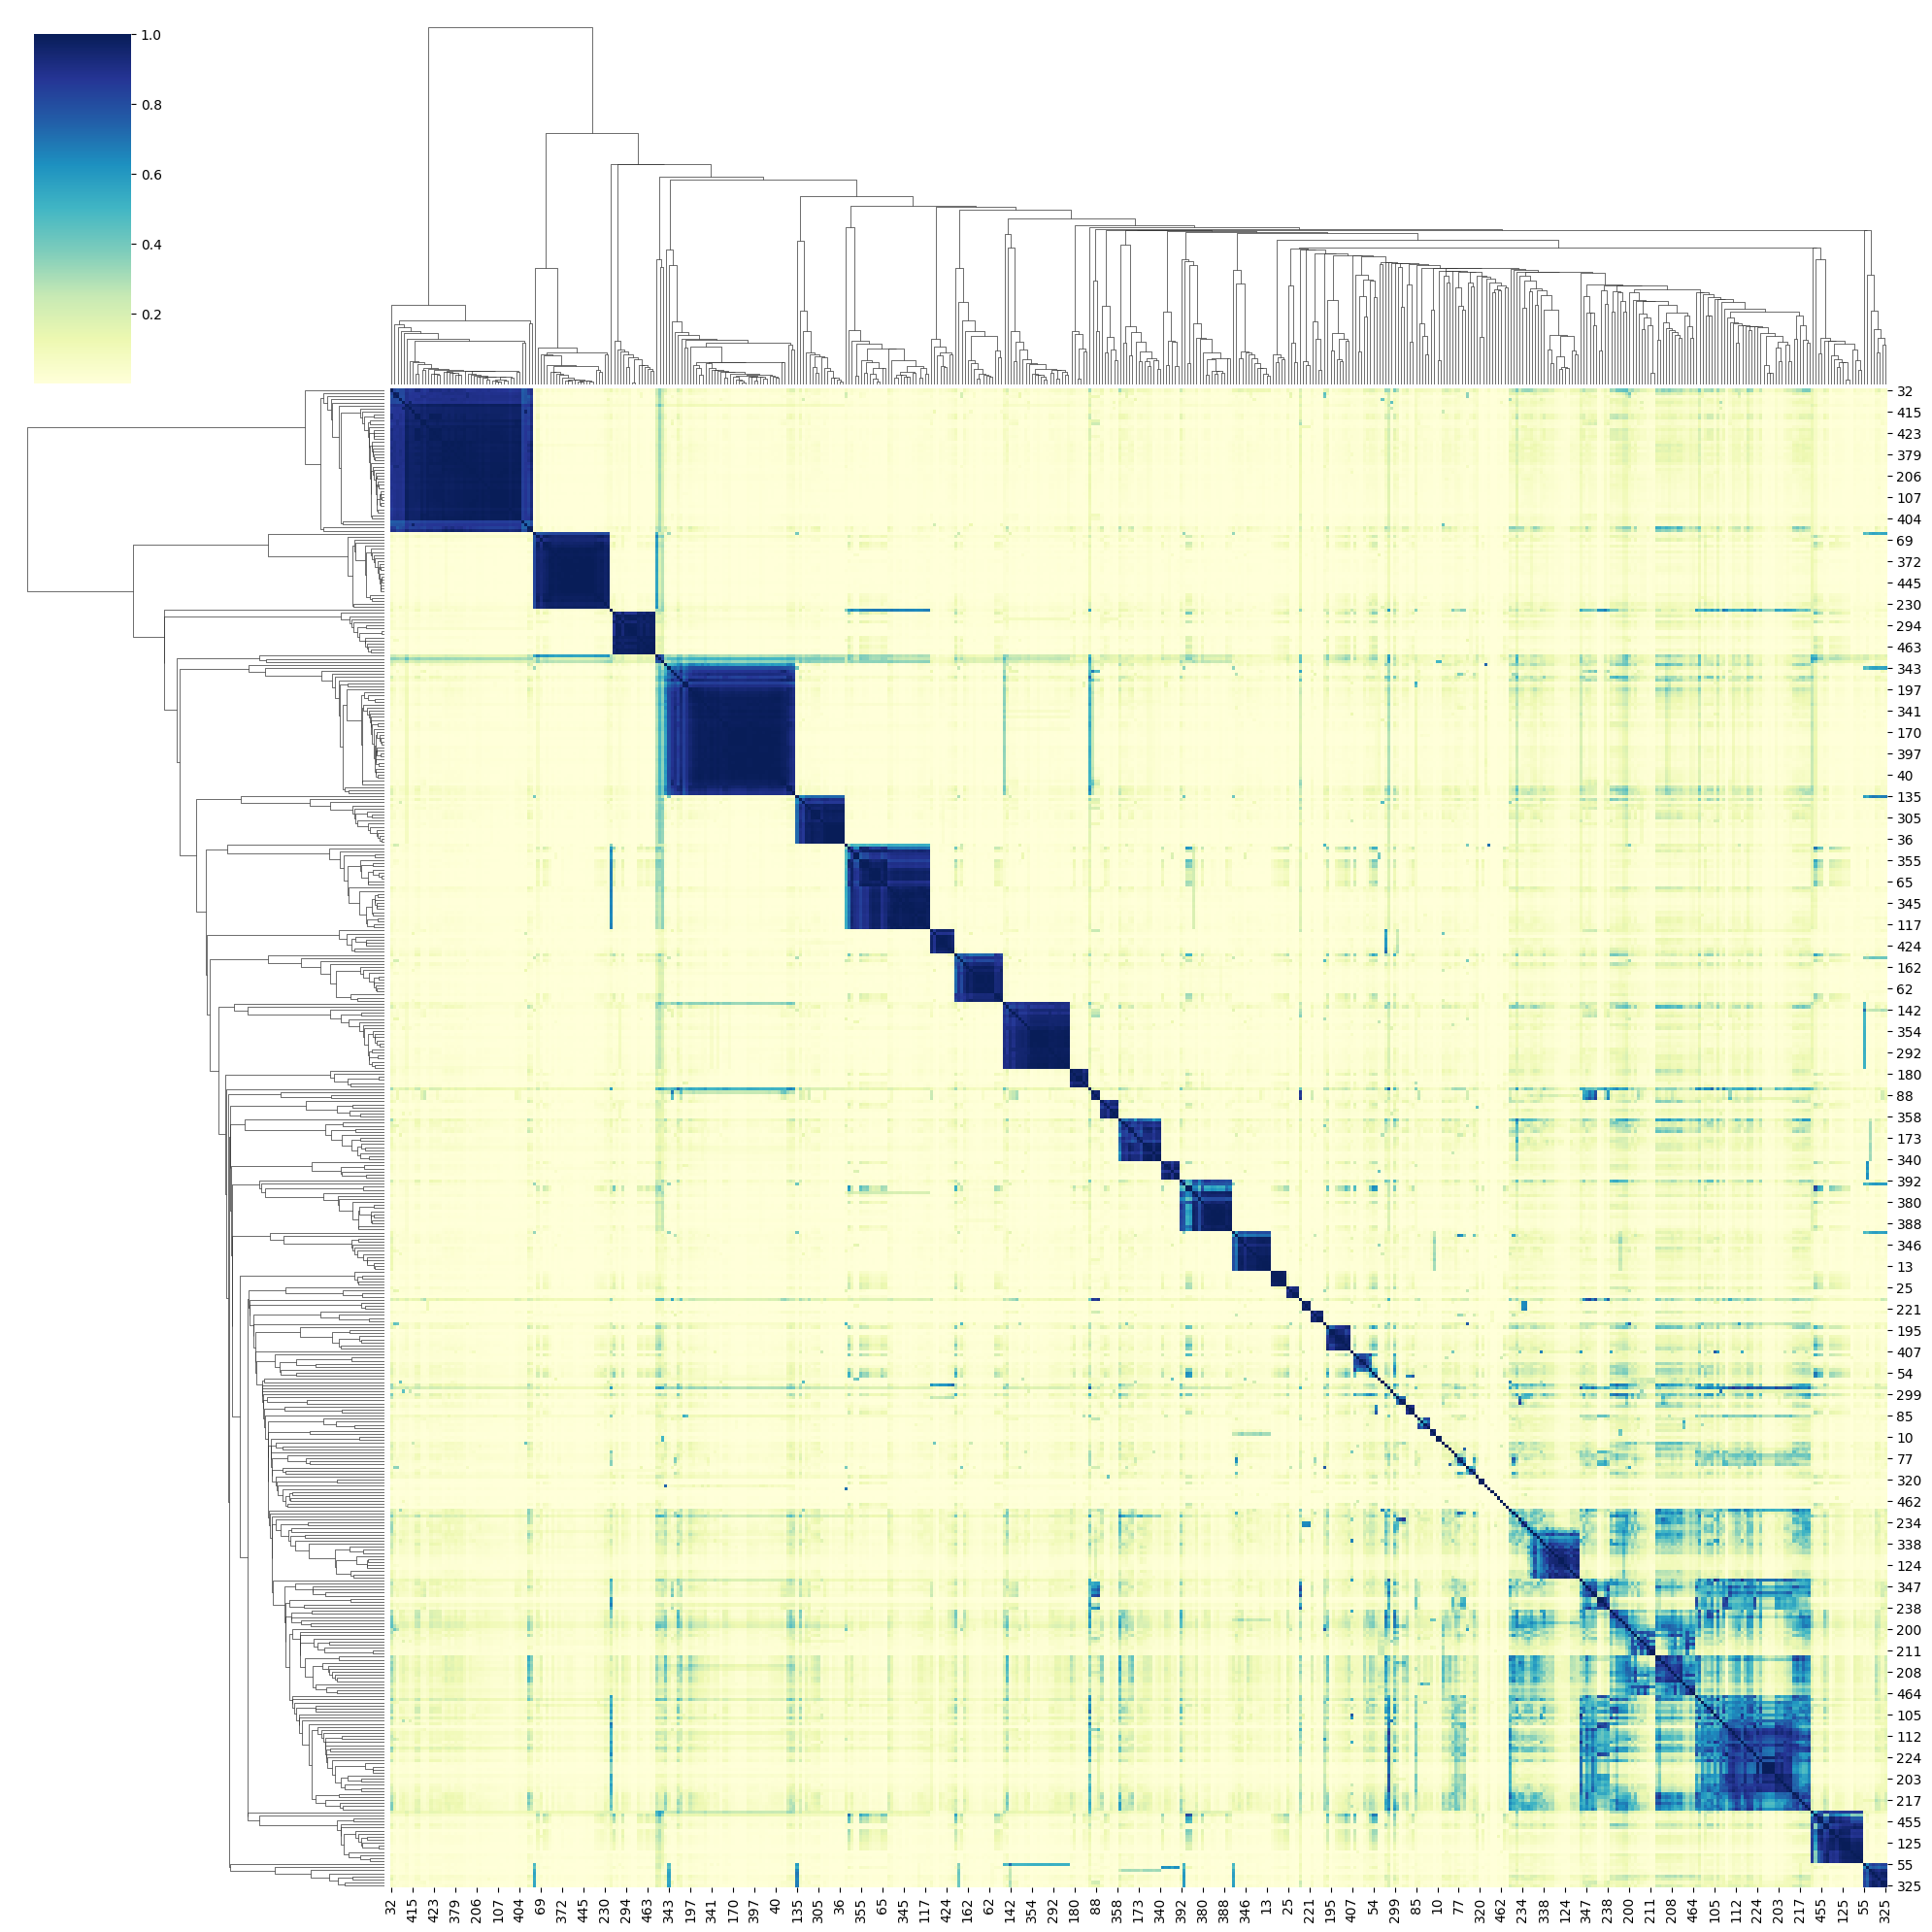

In [7]:
CorrPatients_=np.corrcoef(X_s)
#reperform clustering on patients corr map
row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_.T), method='single')
    
cl=sns.clustermap(CorrPatients_, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringEuclidean.pdf') 